In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
counts = np.loadtxt('data/txtdata.csv')

In [3]:
counts

array([13., 24.,  8., 24.,  7., 35., 14., 11., 15., 11., 22., 22., 11.,
       57., 11., 19., 29.,  6., 19., 12., 22., 12., 18., 72., 32.,  9.,
        7., 13., 19., 23., 27., 20.,  6., 17., 13., 10., 14.,  6., 16.,
       15.,  7.,  2., 15., 15., 19., 70., 49.,  7., 53., 22., 21., 31.,
       19., 11., 18., 20., 12., 35., 17., 23., 17.,  4.,  2., 31., 30.,
       13., 27.,  0., 39., 37.,  5., 14., 13., 22.])

<BarContainer object of 74 artists>

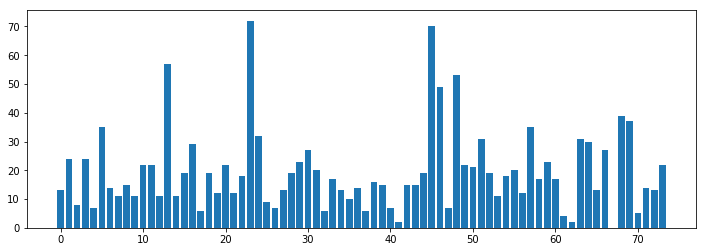

In [4]:
ncounts = len(counts)
plt.figure(figsize=(12,4))
plt.bar(np.arange(ncounts), counts)

# Set up prior distributions

In [5]:
import pymc as pm

In [6]:
alpha = 1.0/counts.mean()

In [7]:
counts.mean()

19.743243243243242

In [8]:
alpha

0.05065023956194388

Exponentials to describe mean of the distribution at two different points

In [9]:
lam1 = pm.Exponential('lam1', alpha)
lam2 = pm.Exponential('lam2', alpha)

In [10]:
print lam1.value, lam2.value

62.964852011967785 1.5054309518388556


Discrete uniform for the switchpoint

In [11]:
tau = pm.DiscreteUniform('tau', 0, ncounts)

In [12]:
print tau.value

71


# Test

Dummy run before function setup

In [13]:
ncounts

74

In [14]:
out = np.zeros(ncounts)

In [15]:
out

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [16]:
tl1 = float(lam1.random())
tl2 = float(lam2.random())
ttau = int(tau.random())

In [17]:
tl1

27.805335976690817

In [18]:
tl2

15.502512494266291

In [19]:
ttau

21

In [20]:
out[:ttau] = tl1

In [21]:
out[ttau:] = tl2

In [22]:
out

array([27.80533598, 27.80533598, 27.80533598, 27.80533598, 27.80533598,
       27.80533598, 27.80533598, 27.80533598, 27.80533598, 27.80533598,
       27.80533598, 27.80533598, 27.80533598, 27.80533598, 27.80533598,
       27.80533598, 27.80533598, 27.80533598, 27.80533598, 27.80533598,
       27.80533598, 15.50251249, 15.50251249, 15.50251249, 15.50251249,
       15.50251249, 15.50251249, 15.50251249, 15.50251249, 15.50251249,
       15.50251249, 15.50251249, 15.50251249, 15.50251249, 15.50251249,
       15.50251249, 15.50251249, 15.50251249, 15.50251249, 15.50251249,
       15.50251249, 15.50251249, 15.50251249, 15.50251249, 15.50251249,
       15.50251249, 15.50251249, 15.50251249, 15.50251249, 15.50251249,
       15.50251249, 15.50251249, 15.50251249, 15.50251249, 15.50251249,
       15.50251249, 15.50251249, 15.50251249, 15.50251249, 15.50251249,
       15.50251249, 15.50251249, 15.50251249, 15.50251249, 15.50251249,
       15.50251249, 15.50251249, 15.50251249, 15.50251249, 15.50

Since we pass in 74 different lambdas, it will calculate a Poisson variable with each

In [23]:
temp = pm.Poisson('obs', out)

In [24]:
final = temp.random()

In [25]:
final

array([28, 26, 27, 34, 31, 37, 35, 25, 26, 32, 22, 25, 27, 41, 28, 19, 31,
       28, 27, 30, 23, 18, 16,  8, 23, 10, 23, 19, 17, 16, 13, 21, 14, 21,
       11, 12, 16, 15, 12, 12, 14, 13, 13, 11, 12, 15, 18, 13, 12, 20, 13,
       19, 17, 16, 13, 15, 16, 13, 21, 12, 22, 13, 17, 17,  7, 16, 13, 17,
       18, 17, 16, 13, 22, 13])

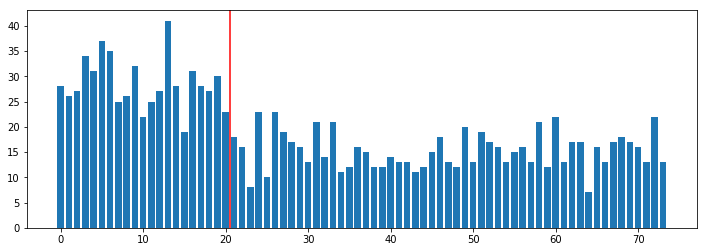

In [26]:
nfinal = len(final)
plt.figure(figsize=(12,4))
plt.bar(np.arange(nfinal), final)
plt.axvline(ttau - 0.5, color='red')

But let's fix observations

How does this work?

In [27]:
counts

array([13., 24.,  8., 24.,  7., 35., 14., 11., 15., 11., 22., 22., 11.,
       57., 11., 19., 29.,  6., 19., 12., 22., 12., 18., 72., 32.,  9.,
        7., 13., 19., 23., 27., 20.,  6., 17., 13., 10., 14.,  6., 16.,
       15.,  7.,  2., 15., 15., 19., 70., 49.,  7., 53., 22., 21., 31.,
       19., 11., 18., 20., 12., 35., 17., 23., 17.,  4.,  2., 31., 30.,
       13., 27.,  0., 39., 37.,  5., 14., 13., 22.])

In [28]:
obs = pm.Poisson("obs", out, value=counts, observed=True)

In [29]:
final = obs.random()

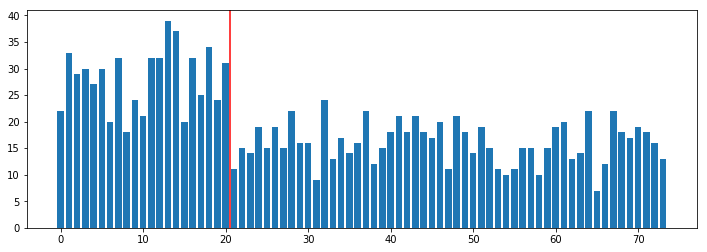

In [30]:
nfinal = len(final)
plt.figure(figsize=(12,4))
plt.bar(np.arange(nfinal), final)
plt.axvline(ttau - 0.5, color='red')

# Real run

In [31]:
lam1 = pm.Exponential('lam1', alpha)
lam2 = pm.Exponential('lam2', alpha)

tau = pm.DiscreteUniform('tau', 0, ncounts)

@pm.deterministic
def lambda_(tau=tau, lambda_1=lam1, lambda_2=lam2):
    out = np.zeros(ncounts)
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after (and including) tau is lambda2
    return out

observation = pm.Poisson("obs", lambda_, value=counts, observed=True)

model = pm.Model([observation, lam1, lam2, tau])

In [32]:
# Mysterious code to be explained in Chapter 3.
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)

 [-----------------100%-----------------] 40000 of 40000 complete in 7.4 sec

In [33]:
lam1samp = mcmc.trace('lam1')[:]
lam2samp = mcmc.trace('lam2')[:]
tausamp = mcmc.trace('tau')[:]

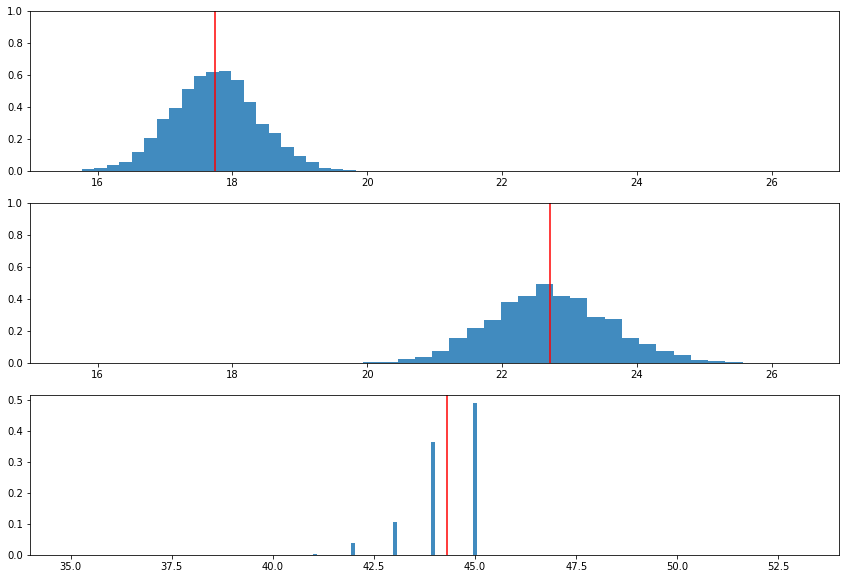

In [40]:
plt.figure(figsize=(14.5, 10))

ax = plt.subplot(311)
plt.hist(lam1samp, bins=30, alpha=0.85, density=True)
plt.xlim([15,27])
plt.ylim([0,1])
plt.axvline(lam1samp.mean(), color='red')

ax = plt.subplot(312)
plt.hist(lam2samp, bins=30, alpha=0.85, density=True)
plt.xlim([15,27])
plt.ylim([0,1])
plt.axvline(lam2samp.mean(), color='red')

ax = plt.subplot(313)
w = 1.0 / tausamp.shape[0] * np.ones_like(tausamp)
plt.hist(tausamp, bins=ncounts, alpha=0.85, weights=w)
plt.xlim([34, 54])
plt.axvline(tausamp.mean(), color='red')

In [43]:
lam1samp.mean()

17.74604616855868

In [44]:
lam2samp.mean()

22.71548502873578

In [38]:
tausamp.mean()

44.308233333333334

In [45]:
N = tausamp.shape[0]
exptexts = np.empty(ncounts)

for day in range(0, ncounts):
    ix = day < tausamp
    exptexts[day] = (lam1samp[ix].sum() + lam2samp[~ix].sum()) / N

In [42]:
exptexts

array([17.74604617, 17.74604617, 17.74604617, 17.74604617, 17.74604617,
       17.74604617, 17.74604617, 17.74604617, 17.74604617, 17.74604617,
       17.74604617, 17.74604617, 17.74604617, 17.74604617, 17.74604617,
       17.74604617, 17.74604617, 17.74604617, 17.74604617, 17.74604617,
       17.74604617, 17.74604617, 17.74604617, 17.74604617, 17.74604617,
       17.74604617, 17.74604617, 17.74604617, 17.74604617, 17.74604617,
       17.74604617, 17.74604617, 17.74604617, 17.74604617, 17.74604617,
       17.74604617, 17.74604617, 17.74604617, 17.74604617, 17.74614331,
       17.74639628, 17.75174557, 17.91357516, 18.40742628, 20.21846199,
       22.71523181, 22.71548503, 22.71548503, 22.71548503, 22.71548503,
       22.71548503, 22.71548503, 22.71548503, 22.71548503, 22.71548503,
       22.71548503, 22.71548503, 22.71548503, 22.71548503, 22.71548503,
       22.71548503, 22.71548503, 22.71548503, 22.71548503, 22.71548503,
       22.71548503, 22.71548503, 22.71548503, 22.71548503, 22.71

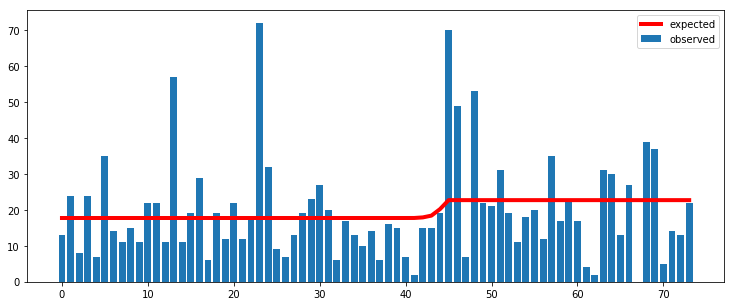

In [52]:
plt.figure(figsize=(12.5, 5))

plt.plot(range(ncounts), exptexts, lw=4, color='red', label='expected')
plt.bar(np.arange(ncounts), counts, label='observed')
plt.legend()